In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from system_ode import PlotSolution, GetDataset, PlotPredictions
from machinelearning import main, plot_net_predictions
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
# set seed for reproducibility
np.random.seed(0)

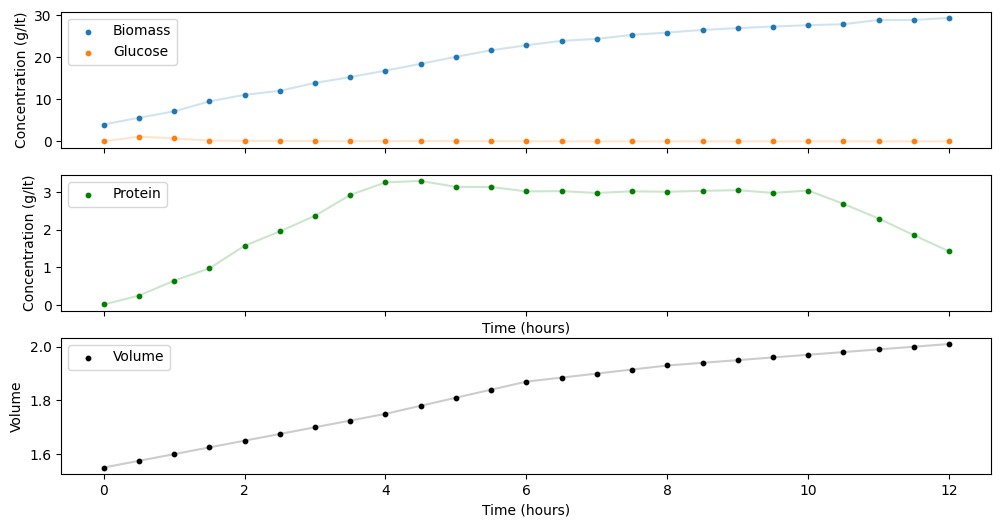

In [10]:
full_df = GetDataset(alpha=[0.3, 0.5, 0.1], noise=True)
PlotSolution(full_df)

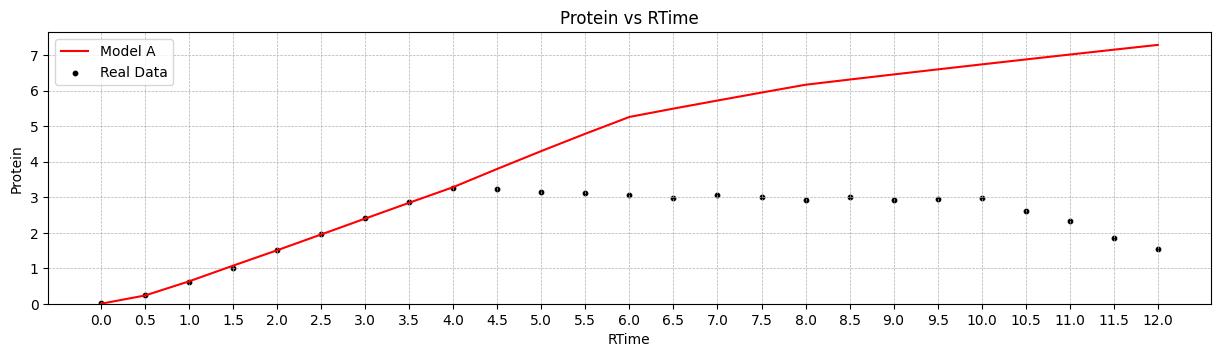

In [7]:
from system_ode import Fs, S_IN, Rg, MU_MAX, K_S, Y_XS, IC, t_sim
from scipy.integrate import odeint

def model_A(t: float, alpha: float):
    return alpha * 1 / (1 + np.exp(-t))

def simulate(model: str, alpha: float, beta: float = None) -> np.ndarray:
    # differential equations
    def SystemODE(x, t):
        X, S, P, V = x
        dX = -Fs(t) * X / V + Rg(X, S, MU_MAX, K_S)
        if model == 'A':
            dP = -Fs(t) * P / V + model_A(t, alpha) * Rg(X, S, MU_MAX, K_S)
        dS = Fs(t) * (S_IN - S) / V - Rg(X, S, MU_MAX, K_S) / Y_XS
        dV = Fs(t)
        return [dX, dS, dP, dV]
    sol = odeint(SystemODE, IC, t_sim)
    return sol.transpose()

# sol_A = simulate('A', net_A.alpha.item())
sol_A = simulate('A', 0.30)

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)
plt.plot(t_sim, sol_A[2], linestyle='-', color='r', label='Model A')
plt.scatter(full_df['RTime'], full_df['Protein'], color='black', s=10, label='Real Data')
plt.xlabel('RTime')
plt.ylabel('Protein')
plt.title('Protein vs RTime')
plt.xticks(np.arange(0, 12.5, 0.5))
plt.ylim(bottom=0)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [11]:
train_df = full_df[full_df['RTime'].between(10, 13)].copy()
train_df

,RTime,Biomass,Glucose,Protein,V
20,10.0,27.409427,0.007480,2.940202,1.977066
21,10.5,28.168224,0.030320,2.616013,1.980105
22,11.0,28.623036,0.019130,2.282382,2.007859
23,11.5,28.891765,0.030320,1.889740,2.001269
24,12.0,29.618070,0.008764,1.512423,2.014020


In [ ]:
net_A, u_pred_A = main(train_df, full_df, num_epochs=30000, model='A')

Epoch 1/30000, Loss: 237.65, Loss Data: 192.17, Loss ODE: 45.48
mu_max: 0.75, alpha: 0.50, beta: 0.50
Epoch 101/30000, Loss: 68.93, Loss Data: 62.84, Loss ODE: 6.09
mu_max: 0.75, alpha: 0.41, beta: 0.50
Epoch 201/30000, Loss: 27.95, Loss Data: 25.20, Loss ODE: 2.75
mu_max: 0.75, alpha: 0.35, beta: 0.50
Epoch 301/30000, Loss: 11.24, Loss Data: 9.61, Loss ODE: 1.63
mu_max: 0.75, alpha: 0.30, beta: 0.50
Epoch 401/30000, Loss: 5.06, Loss Data: 3.74, Loss ODE: 1.32
mu_max: 0.75, alpha: 0.26, beta: 0.50
Epoch 501/30000, Loss: 2.38, Loss Data: 1.53, Loss ODE: 0.85
mu_max: 0.75, alpha: 0.23, beta: 0.50
Epoch 601/30000, Loss: 1.42, Loss Data: 0.69, Loss ODE: 0.74
mu_max: 0.75, alpha: 0.20, beta: 0.50
Epoch 701/30000, Loss: 1.04, Loss Data: 0.35, Loss ODE: 0.70
mu_max: 0.75, alpha: 0.18, beta: 0.50
Epoch 801/30000, Loss: 0.71, Loss Data: 0.20, Loss ODE: 0.51
mu_max: 0.75, alpha: 0.15, beta: 0.50
Epoch 901/30000, Loss: 0.57, Loss Data: 0.12, Loss ODE: 0.44
mu_max: 0.75, alpha: 0.12, beta: 0.50
Ep

In [24]:
net_B, u_pred_B = main(train_df, full_df, num_epochs=30000, model='B')

Epoch 1/30000, Loss: 241.59, Loss Data: 192.48, Loss ODE: 49.11
mu_max: 0.75, alpha: 0.50, beta: 0.50
Epoch 101/30000, Loss: 80.84, Loss Data: 74.36, Loss ODE: 6.48
mu_max: 0.75, alpha: 0.53, beta: 0.50
Epoch 201/30000, Loss: 37.50, Loss Data: 33.06, Loss ODE: 4.43
mu_max: 0.75, alpha: 0.43, beta: 0.50
Epoch 301/30000, Loss: 17.93, Loss Data: 13.89, Loss ODE: 4.04
mu_max: 0.75, alpha: 0.40, beta: 0.50
Epoch 401/30000, Loss: 9.21, Loss Data: 6.51, Loss ODE: 2.70
mu_max: 0.75, alpha: 0.40, beta: 0.50
Epoch 501/30000, Loss: 4.87, Loss Data: 3.35, Loss ODE: 1.51
mu_max: 0.75, alpha: 0.40, beta: 0.50
Epoch 601/30000, Loss: 2.21, Loss Data: 1.35, Loss ODE: 0.85
mu_max: 0.75, alpha: 0.42, beta: 0.50
Epoch 701/30000, Loss: 1.23, Loss Data: 0.59, Loss ODE: 0.64
mu_max: 0.75, alpha: 0.46, beta: 0.50
Epoch 801/30000, Loss: 0.86, Loss Data: 0.28, Loss ODE: 0.58
mu_max: 0.75, alpha: 0.45, beta: 0.50
Epoch 901/30000, Loss: 0.83, Loss Data: 0.16, Loss ODE: 0.68
mu_max: 0.75, alpha: 0.46, beta: 0.50
E

In [25]:
net_C, u_pred_C = main(train_df, full_df, num_epochs=30000, model='C')

Epoch 1/30000, Loss: 236.85, Loss Data: 187.70, Loss ODE: 49.14
mu_max: 0.75, alpha: 0.50, beta: 0.50
Epoch 101/30000, Loss: 89.64, Loss Data: 75.70, Loss ODE: 13.94
mu_max: 0.75, alpha: 0.58, beta: 0.43
Epoch 201/30000, Loss: 40.03, Loss Data: 28.78, Loss ODE: 11.25
mu_max: 0.75, alpha: 0.63, beta: 0.39
Epoch 301/30000, Loss: 18.07, Loss Data: 10.32, Loss ODE: 7.75
mu_max: 0.75, alpha: 0.70, beta: 0.33
Epoch 401/30000, Loss: 9.47, Loss Data: 4.66, Loss ODE: 4.81
mu_max: 0.75, alpha: 0.76, beta: 0.28
Epoch 501/30000, Loss: 4.52, Loss Data: 2.08, Loss ODE: 2.44
mu_max: 0.75, alpha: 0.80, beta: 0.23
Epoch 601/30000, Loss: 2.07, Loss Data: 0.83, Loss ODE: 1.24
mu_max: 0.75, alpha: 0.83, beta: 0.19
Epoch 701/30000, Loss: 1.24, Loss Data: 0.35, Loss ODE: 0.89
mu_max: 0.75, alpha: 0.84, beta: 0.16
Epoch 801/30000, Loss: 1.00, Loss Data: 0.18, Loss ODE: 0.82
mu_max: 0.75, alpha: 0.84, beta: 0.15
Epoch 901/30000, Loss: 0.78, Loss Data: 0.11, Loss ODE: 0.68
mu_max: 0.75, alpha: 0.84, beta: 0.13

In [26]:
print('Model A')
print(f' * mu_max = {net_A.mu_max.item():.4f}')
print(f' * alpha = {net_A.alpha.item():.4f}')

print('Model B')
print(f' * mu_max = {net_B.mu_max.item():.4f}')
print(f' * alpha = {net_B.alpha.item():.4f}')

print('Model C')
print(f' * mu_max = {net_C.mu_max.item():.4f}')
print(f' * alpha = {net_C.alpha.item():.4f}')
print(f' * beta = {net_C.beta.item():.4f}')

Model A
 * mu_max = 0.7500
 * alpha = 0.0027
Model B
 * mu_max = 0.7500
 * alpha = 0.2239
Model C
 * mu_max = 0.7500
 * alpha = 0.2531
 * beta = 0.0403


In [13]:
val_A = u_pred_A[u_pred_A['RTime'].between(10,13)].copy()
val_B = u_pred_B[u_pred_B['RTime'].between(10,13)].copy()
val_C = u_pred_C[u_pred_C['RTime'].between(10,13)].copy()

# Calculate MSE for each model
mse_A_x = mean_squared_error(train_df['Biomass'], val_A['Biomass'])
mse_B_x = mean_squared_error(train_df['Biomass'], val_B['Biomass'])
mse_C_x = mean_squared_error(train_df['Biomass'], val_C['Biomass'])

mse_A_s = mean_squared_error(train_df['Glucose'], val_A['Glucose'])
mse_B_s = mean_squared_error(train_df['Glucose'], val_B['Glucose'])
mse_C_s = mean_squared_error(train_df['Glucose'], val_C['Glucose'])

mse_A_p = mean_squared_error(train_df['Protein'], val_A['Protein'])
mse_B_p = mean_squared_error(train_df['Protein'], val_B['Protein'])
mse_C_p = mean_squared_error(train_df['Protein'], val_C['Protein'])

print(f'MSE Biomass Model A: {mse_A_x:.4f}')
print(f'MSE Biomass Model B: {mse_B_x:.4f}')
print(f'MSE Biomass Model C: {mse_C_x:.4f}')
print()
print(f'MSE Glucose Model A: {mse_A_s:.4f}')
print(f'MSE Glucose Model B: {mse_B_s:.4f}')
print(f'MSE Glucose Model C: {mse_C_s:.4f}')
print()
print(f'MSE Protein Model A: {mse_A_p:.4f}')
print(f'MSE Protein Model B: {mse_B_p:.4f}')
print(f'MSE Protein Model C: {mse_C_p:.4f}')
print()
print(f'MSE Model A: {np.mean([mse_A_x, mse_A_s, mse_A_p]):.4f}')
print(f'MSE Model B: {np.mean([mse_B_x, mse_B_s, mse_B_p]):.4f}')
print(f'MSE Model C: {np.mean([mse_C_x, mse_C_s, mse_C_p]):.4f}')

MSE Biomass Model A: 0.0120
MSE Biomass Model B: 0.0194
MSE Biomass Model C: 0.0154

MSE Glucose Model A: 0.0001
MSE Glucose Model B: 0.0001
MSE Glucose Model C: 0.0001

MSE Protein Model A: 0.0020
MSE Protein Model B: 0.0616
MSE Protein Model C: 0.0002

MSE Model A: 0.0047
MSE Model B: 0.0270
MSE Model C: 0.0052


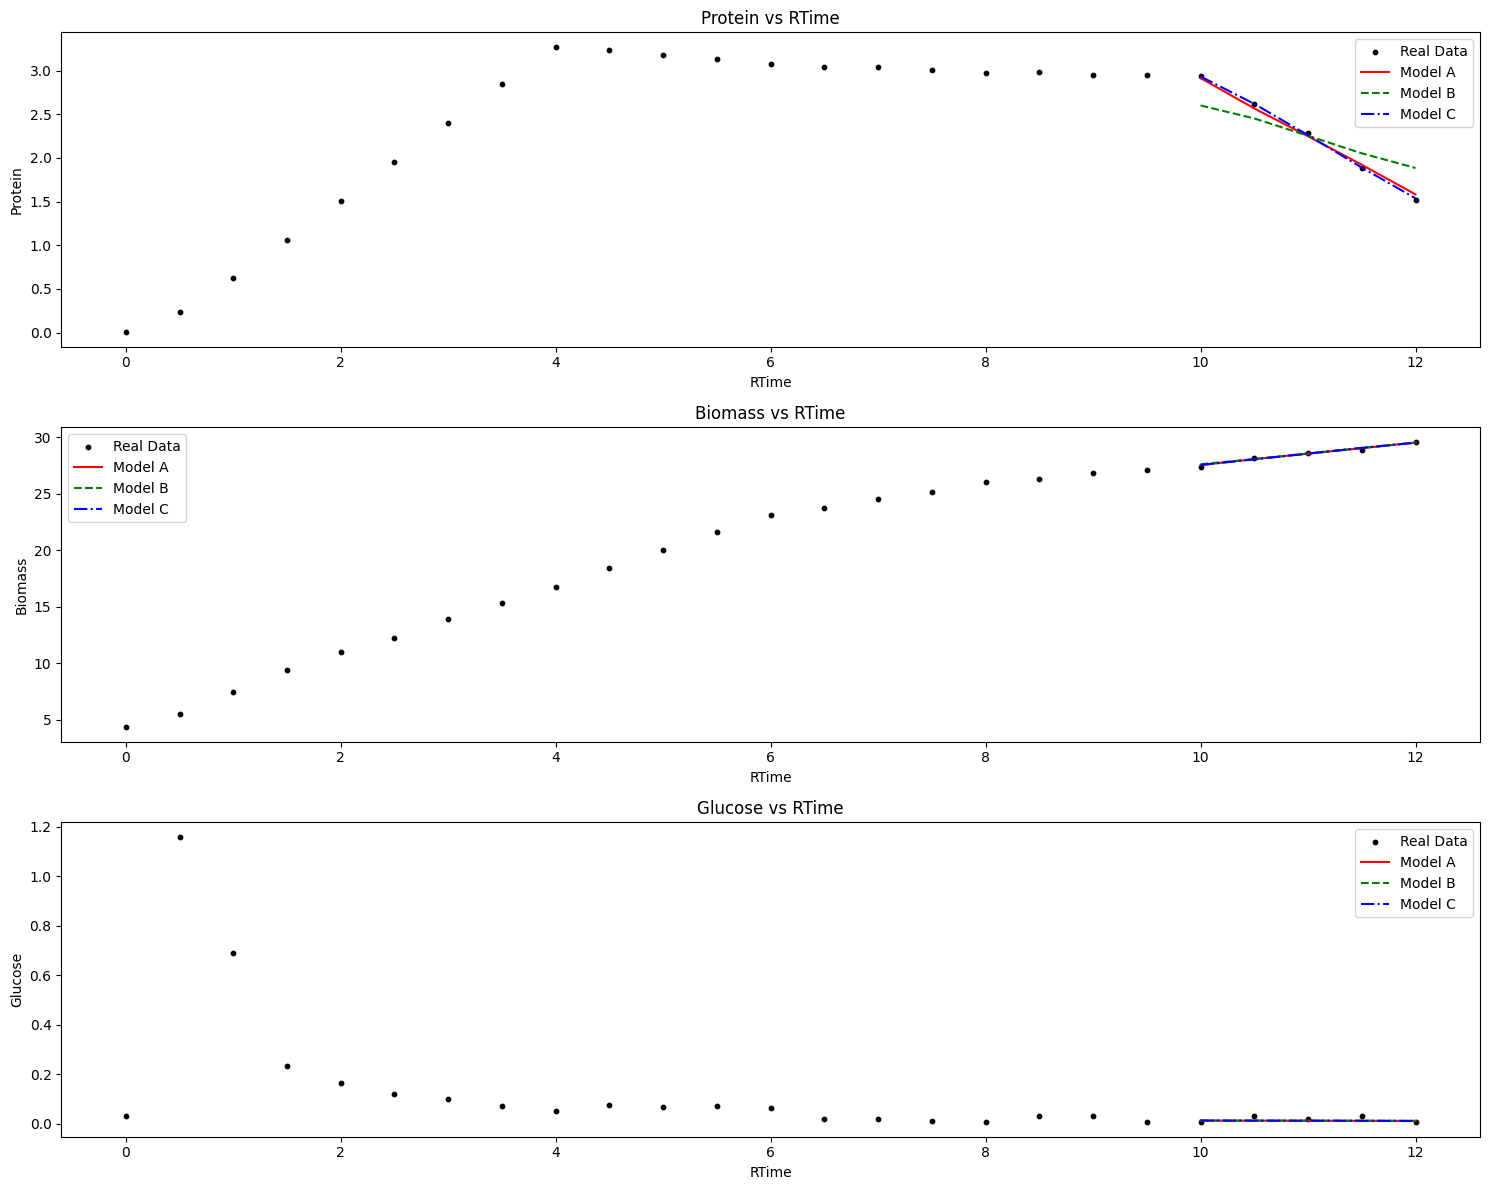

In [14]:
plt.figure(figsize=(15, 12))

# Plot Protein
plt.subplot(3, 1, 1)
plt.scatter(full_df['RTime'], full_df['Protein'], color='black', s=10, label='Real Data')
plt.plot(val_A['RTime'], val_A['Protein'], linestyle='-', color='r', label='Model A')
plt.plot(val_B['RTime'], val_B['Protein'], linestyle='--', color='g', label='Model B')
plt.plot(val_C['RTime'], val_C['Protein'], linestyle='-.', color='b', label='Model C')
plt.xlabel('RTime')
plt.ylabel('Protein')
plt.title('Protein vs RTime')
plt.legend()

# Plot Biomass
plt.subplot(3, 1, 2)
plt.scatter(full_df['RTime'], full_df['Biomass'], color='black', s=10, label='Real Data')
plt.plot(val_A['RTime'], val_A['Biomass'], linestyle='-', color='r', label='Model A')
plt.plot(val_B['RTime'], val_B['Biomass'], linestyle='--', color='g', label='Model B')
plt.plot(val_C['RTime'], val_C['Biomass'], linestyle='-.', color='b', label='Model C')
plt.xlabel('RTime')
plt.ylabel('Biomass')
plt.title('Biomass vs RTime')
plt.legend()

# Plot Glucose
plt.subplot(3, 1, 3)
plt.scatter(full_df['RTime'], full_df['Glucose'], color='black', s=10, label='Real Data')
plt.plot(val_A['RTime'], val_A['Glucose'], linestyle='-', color='r', label='Model A')
plt.plot(val_B['RTime'], val_B['Glucose'], linestyle='--', color='g', label='Model B')
plt.plot(val_C['RTime'], val_C['Glucose'], linestyle='-.', color='b', label='Model C')
plt.xlabel('RTime')
plt.ylabel('Glucose')
plt.title('Glucose vs RTime')
plt.legend()

plt.tight_layout()
plt.show()

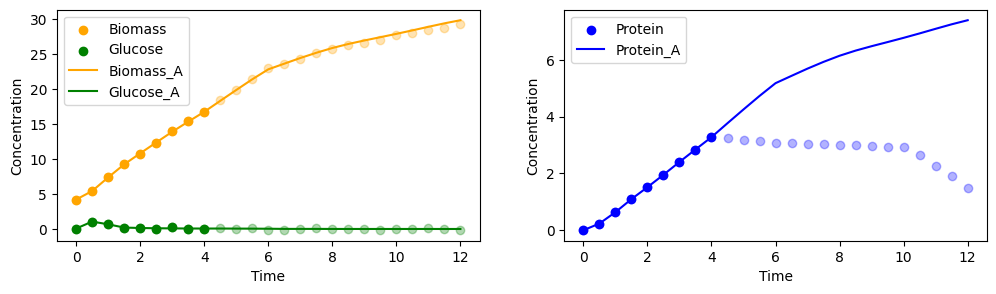

In [36]:
plot_net_predictions(full_df=full_df, train_df=train_df, u_pred=u_pred_A)

In [37]:
sim_pred_df = GetDataset(mumax = net.mu_max.item(), alpha = net.alpha.item())
PlotPredictions(train_df, sim_pred_df)

NameError: name 'net' is not defined